# 비슷한 유형의 문제들 그룹핑하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = 'datas_ml/technical_support_data.csv'
df = pd.read_csv(data_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [4]:
df.isna().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [5]:
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [6]:
df.columns

Index(['PROBLEM_TYPE', 'no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent'],
      dtype='object')

In [7]:
X = df.loc[:, 'no_of_cases':]
X

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.00,75,25
1,12,2.0,150,0.01,0.50,5,95
2,5,1.0,35,0.02,0.20,90,10
3,3,2.0,8,0.01,0.70,5,95
4,45,2.3,54,0.15,0.00,99,1
5,47,3.1,132,0.30,0.03,100,0
6,12,4.0,154,0.02,0.05,100,0
7,165,1.2,32,0.03,0.00,95,5
8,321,1.0,5,0.21,0.00,60,40
9,22,3.3,140,0.14,0.01,95,5


# 데이터 정규화

In [8]:
df['PROBLEM_TYPE'].value_counts()

PROBLEM_TYPE
Temperature control not working              1
power chord does not tightly fit             1
Fan swing not working                        1
Main switch does not on                      1
Forgot mobile app password                   1
AC stops abruptly                            1
App hangs while entring commands             1
App takes a long time to initialize          1
Unable to connect the App to the device      1
Reinstalling the app hangs the phone         1
Mobile screen blanks on use of phone         1
Cluttered with popup messages                1
AC controller sofware missing                1
AC remote does not  work                     1
Remote Keys get stuck                        1
Unable to operate menu from remote           1
Motor noise from the system                  1
Freshner holder stuck                        1
Factory settings not working                 1
WIFI connectivity breaks                     1
Battery backup does not get fully charged    1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['PROBLEM_TYPE'] = encoder.fit_transform(df['PROBLEM_TYPE'])

In [11]:
X.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,170,1.3,32,0.04,0.0,75,25,18
1,12,2.0,150,0.01,0.5,5,95,22
2,5,1.0,35,0.02,0.2,90,10,10
3,3,2.0,8,0.01,0.7,5,95,13
4,45,2.3,54,0.15,0.0,99,1,11


In [10]:
from sklearn.preprocessing import StandardScaler

# StandardScaler로 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DataFrame으로 변환
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

# PROBLEM_TYPE 컬럼 추가
# X_scaled.insert(0, 'PROBLEM_TYPE', df['PROBLEM_TYPE'].values)

print(X_scaled)

    no_of_cases  Avg_pending_calls  Avg_resol_time  recurrence_freq  \
0      0.179429          -0.701207       -0.538351        -0.843188   
1     -0.862176           0.027143        1.510857        -1.101765   
2     -0.908323          -1.013357       -0.486253        -1.015573   
3     -0.921508           0.027143       -0.955140        -1.101765   
4     -0.644625           0.339294       -0.156296         0.104930   
5     -0.631441           1.171694        1.198266         1.397818   
6     -0.862176           2.108144        1.580322        -1.015573   
7      0.146467          -0.805257       -0.538351        -0.929380   
8      1.174886          -1.013357       -1.007238         0.622085   
9     -0.796251           1.379794        1.337195         0.018738   
10    -0.789659           2.420294        1.389294         0.622085   
11     0.574975          -0.701207       -0.694647        -1.015573   
12     0.331055          -0.805257       -0.520985        -0.929380   
13    

# 최적의 k 구하기

In [11]:
# 1. WCSS값을 구해서 앨보우 메서드를 확인한다.

In [12]:
from sklearn.cluster import KMeans

## Elbow Method (최적의 k 찾기)
- 클러스터 내 제곱합(Within-Cluster Sum of Squares, WCSS)
- 각 데이터 포인트와 해당 클러스터의 중심점(centroid) 사이의 거리의 제곱을 모두 합한 값

In [13]:
wcss = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters = k, random_state = 5)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

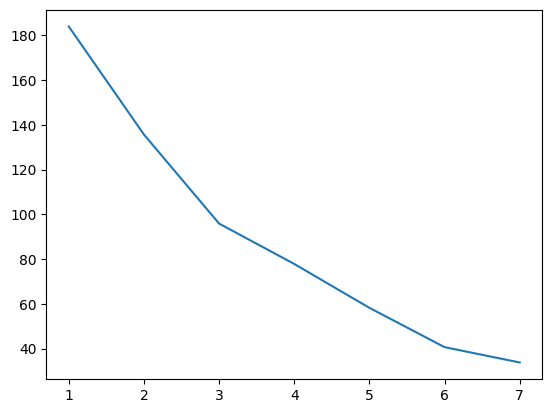

In [14]:
plt.plot(range(1,8), wcss)
plt.show()

In [16]:
# 2. k값을 정해서 그룹힝판다 -> 클러스터링 한다

In [17]:
kmeans = KMeans(n_clusters = 3, random_state = 5)

In [18]:
y_pred = kmeans.fit_predict(X_scaled)
y_pred

array([1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       2], dtype=int32)

In [19]:
X_scaled['Group'] = y_pred

In [20]:
X_scaled.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE,Group
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1.055290,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,1.658312,2
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,-0.150756,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,0.301511,2
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,0.000000,0


In [21]:
df["Group"] = y_pred
df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,1
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,1
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0


In [22]:
df.loc[df['Group']==2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,2
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,2
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,2
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,2
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,2


# 군집 시각화

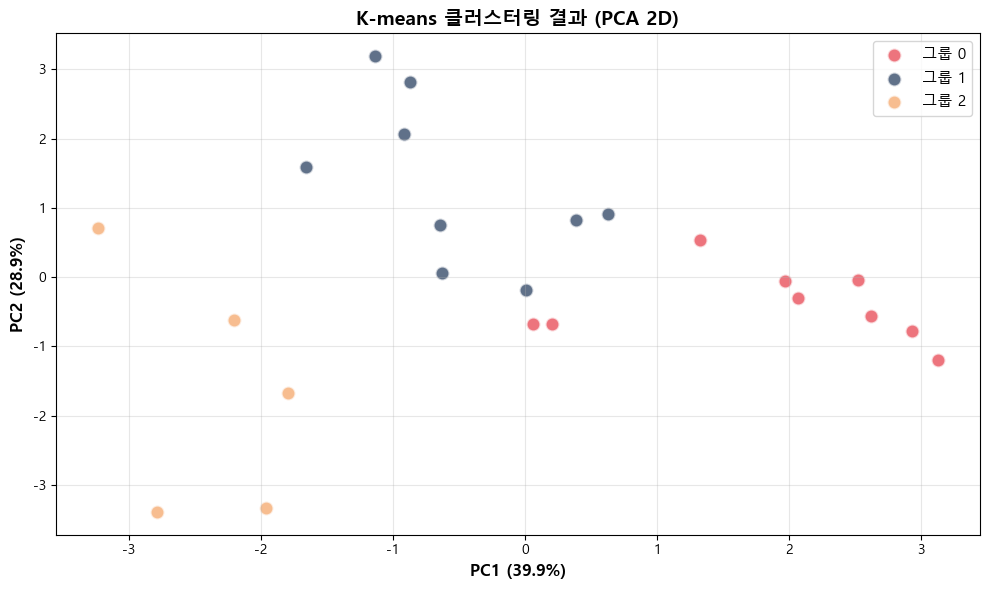

PCA 2D - 정보의 분산 설명력 : 68.7%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
# df = pd.read_csv('your_data.csv')

# 독립변수 (Group 제외)
X = X_scaled.drop('Group', axis=1)
y = X_scaled['Group']

# 색상 설정
colors = ['#E63946', '#1D3557', '#F4A261', '#2A9D8F', '#E76F51', '#8338EC']
groups = sorted(y.unique())

# ========================================
# 1. PCA (2D)
# ========================================
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for group in groups:
    mask = y == group
    plt.scatter(X_pca_2d[mask, 0], 
               X_pca_2d[mask, 1],
               c=colors[group], 
               label=f'그룹 {group}',
               alpha=0.7,
               s=100,
               edgecolors='white',
               linewidth=1.5)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})', fontsize=12, fontweight='bold')
plt.title('K-means 클러스터링 결과 (PCA 2D)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"PCA 2D - 정보의 분산 설명력 : {pca_2d.explained_variance_ratio_.sum():.1%}")

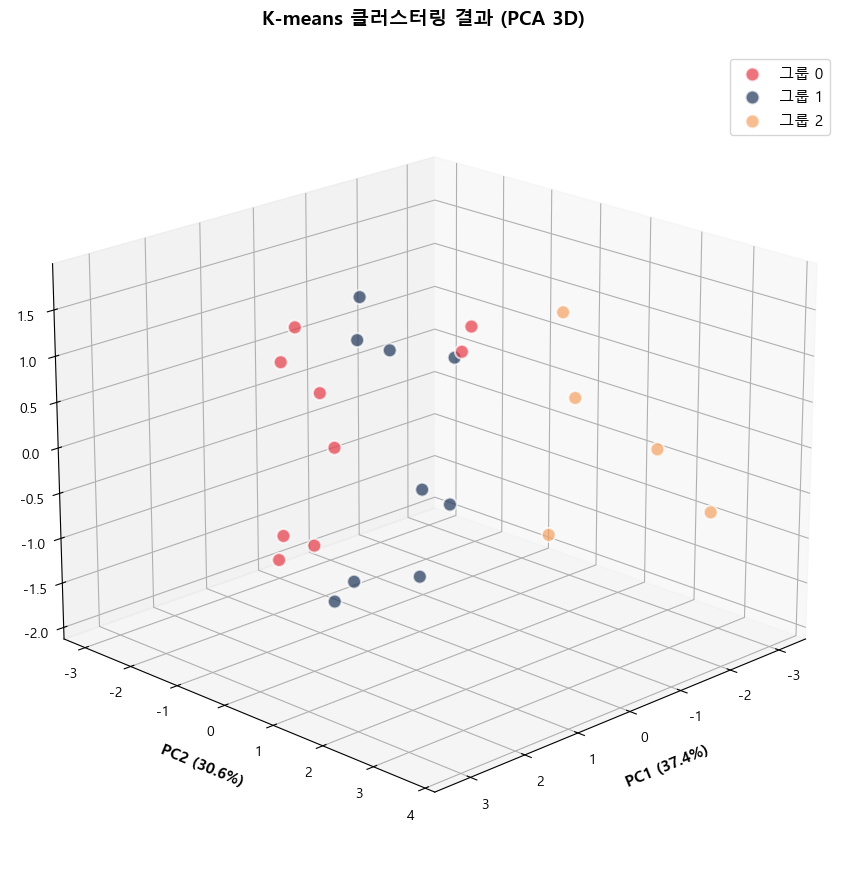

PCA 3D - 정보의 분산 설명력 : 80.7%

그룹별 데이터 수:
Group
0    9
1    9
2    5
Name: count, dtype: int64


In [24]:
# ========================================
# 2. PCA (3D)
# ========================================
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for group in groups:
    mask = y == group
    ax.scatter(X_pca_3d[mask, 0], 
              X_pca_3d[mask, 1],
              X_pca_3d[mask, 2],
              c=colors[group], 
              label=f'그룹 {group}',
              alpha=0.7,
              s=100,
              edgecolors='white',
              linewidth=1.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})', fontsize=11, fontweight='bold', labelpad=10)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})', fontsize=11, fontweight='bold', labelpad=10)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})', fontsize=11, fontweight='bold', labelpad=10)
ax.set_title('K-means 클러스터링 결과 (PCA 3D)', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.view_init(elev=20, azim=45)
plt.tight_layout()
plt.show()

print(f"PCA 3D - 정보의 분산 설명력 : {pca_3d.explained_variance_ratio_.sum():.1%}")

# ========================================
# 4. 그룹별 통계
# ========================================
print("\n그룹별 데이터 수:")
print(y.value_counts().sort_index())

# DBSCAN으로 군집 수행하기

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
size_dbscan = DBSCAN(eps=1.0)
size_db_pred = size_dbscan.fit_predict(size_data)

NameError: name 'size_data' is not defined